# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [59]:
api = Neuroscout()

## Define predictors and confounds

In [60]:
predictors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool', 
              'people']

In [40]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [41]:
#single_models = create_single_models(predictors, confounds)

In [61]:
filename = Path('models') / 'single_predictor.json'

In [53]:
dump_collection(single_models, filename)

In [62]:
single_models = load_collection(filename)

## Generate reports

In [42]:
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [43]:
for p in predictors:
    single_models[p]['Budapest']['movie'].plot_report()

KeyError: 'speech'

## Inspect regressors

In [ ]:
df = _extract_regressors(single_models)

In [ ]:
plot_regressor_distribution(df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor_timeseries(df=df, split_by='row', height=1.2, aspect=10)

In [ ]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [56]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{pred} {model.status} for {dataset}')

action PASSED for Budapest
action PASSED for HealthyBrainNetwork
action PASSED for LearningTemporalStructure
action PASSED for Life
action PASSED for Raiders
action PASSED for SchematicNarrative
action PASSED for Sherlock
action PASSED for SherlockMerlin
action PASSED for SherlockMerlin
action PASSED for studyforrest
animal PASSED for Budapest
animal PASSED for HealthyBrainNetwork
animal PASSED for LearningTemporalStructure
animal PASSED for Life
animal PASSED for Raiders
animal PASSED for SchematicNarrative
animal PASSED for Sherlock
animal PASSED for SherlockMerlin
animal PASSED for SherlockMerlin
animal PASSED for studyforrest
any_faces PASSED for HealthyBrainNetwork
any_faces PASSED for LearningTemporalStructure
any_faces PASSED for Raiders
any_faces PASSED for SchematicNarrative
any_faces PASSED for Sherlock
any_faces PASSED for SherlockMerlin
any_faces PASSED for SherlockMerlin
any_faces PASSED for studyforrest
brightness PASSED for Budapest
brightness PASSED for HealthyBrainNetw

In [45]:
' '.join([a[1].hash_id for a in flatten_collection(single_models)])

'9Ed0K'

## Results

In [63]:
flat_models = flatten_collection(single_models)

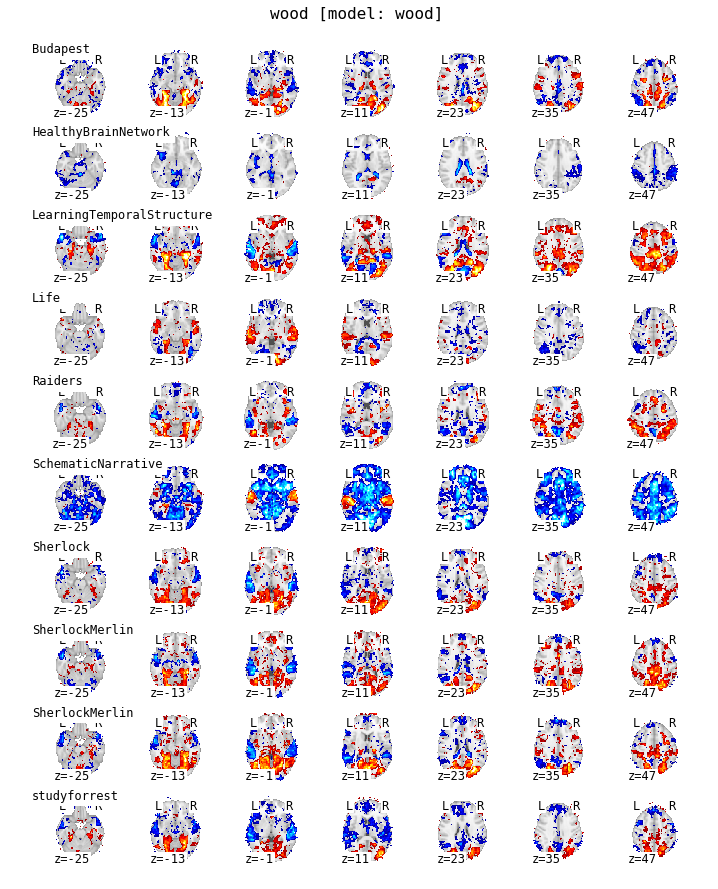

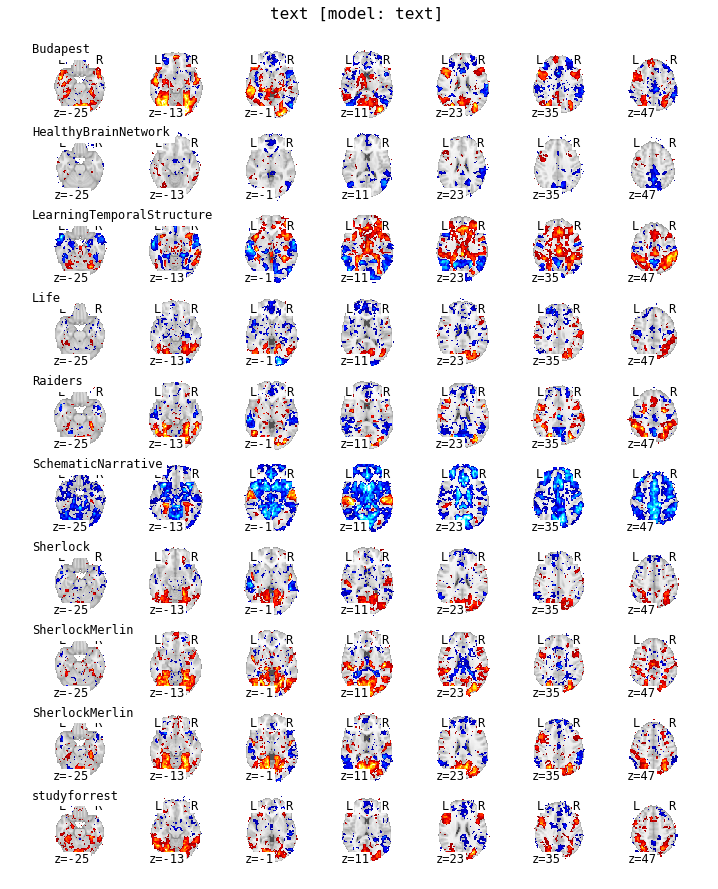

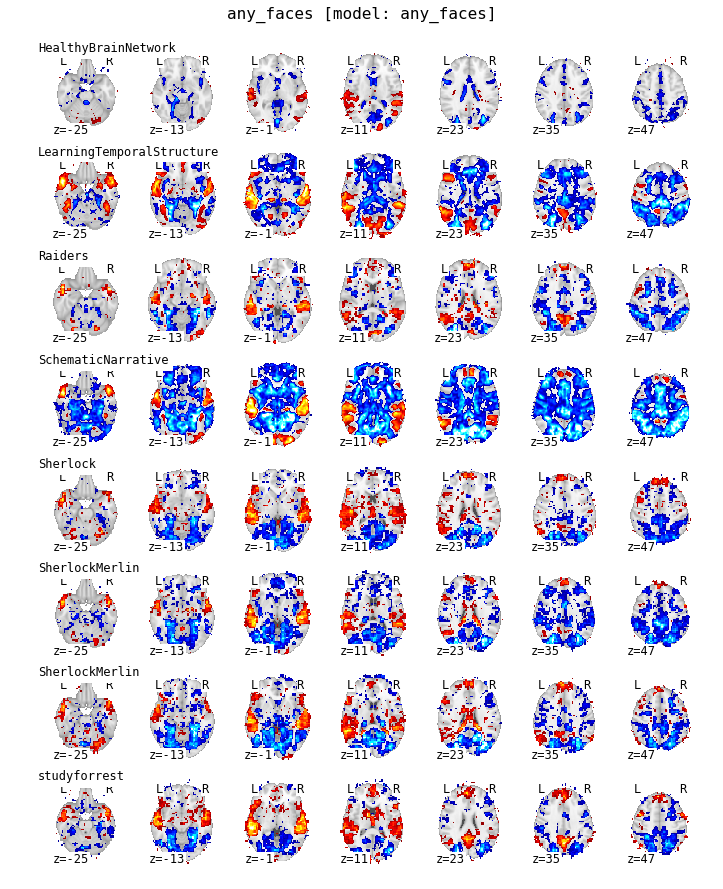

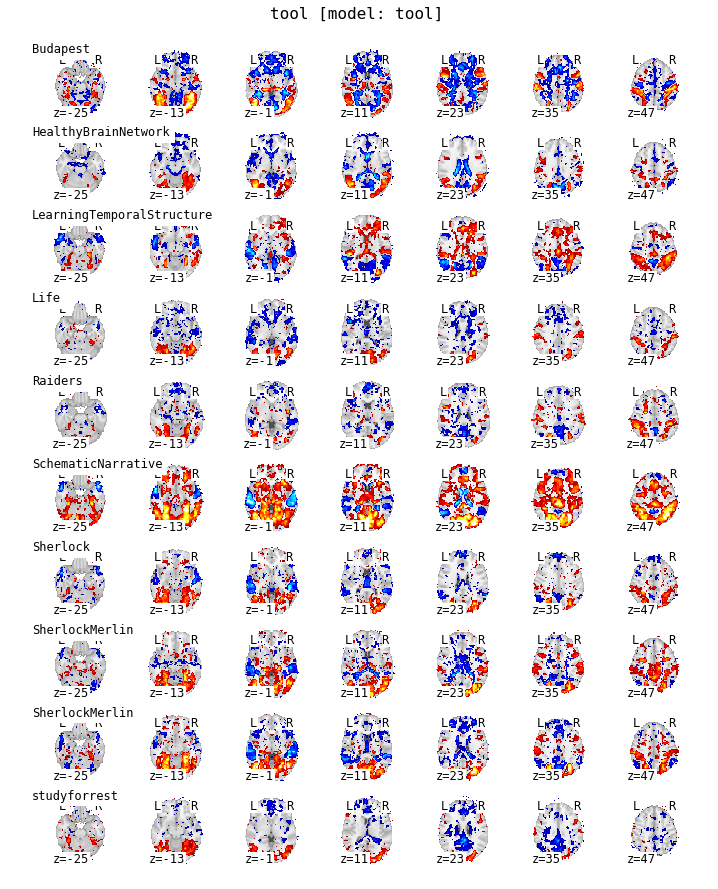

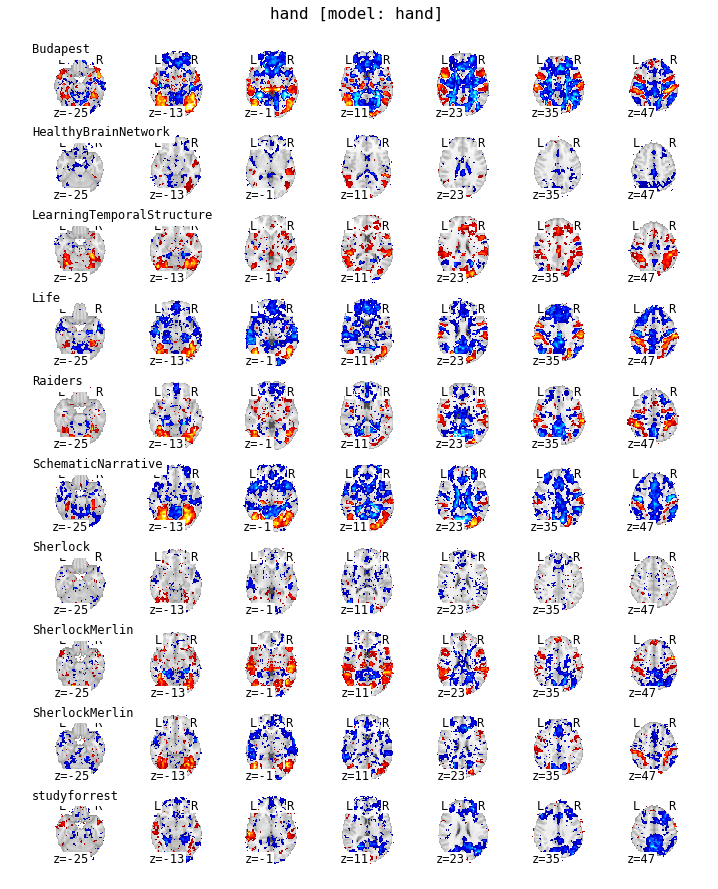

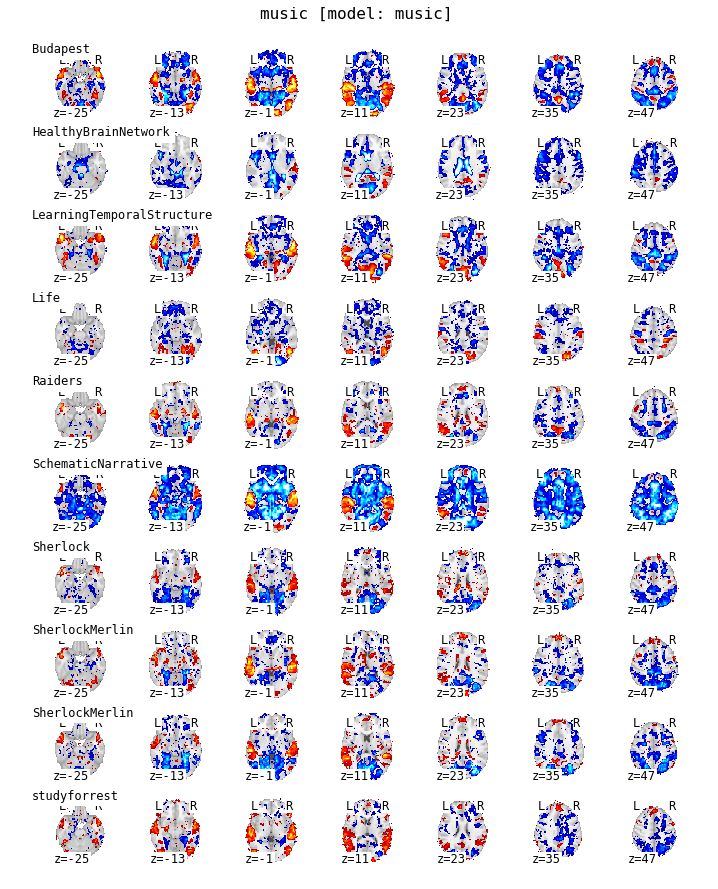

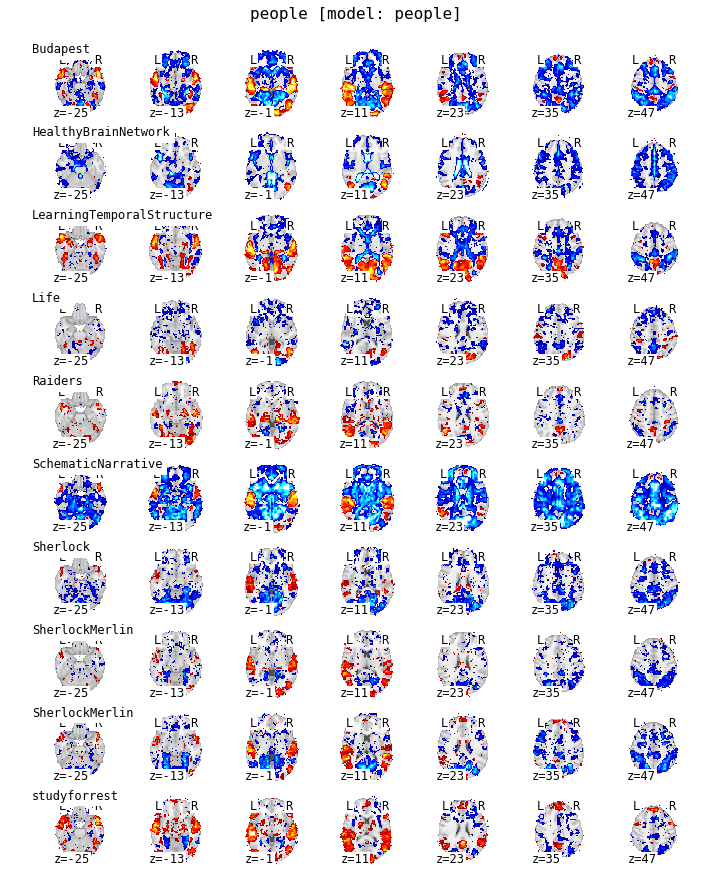

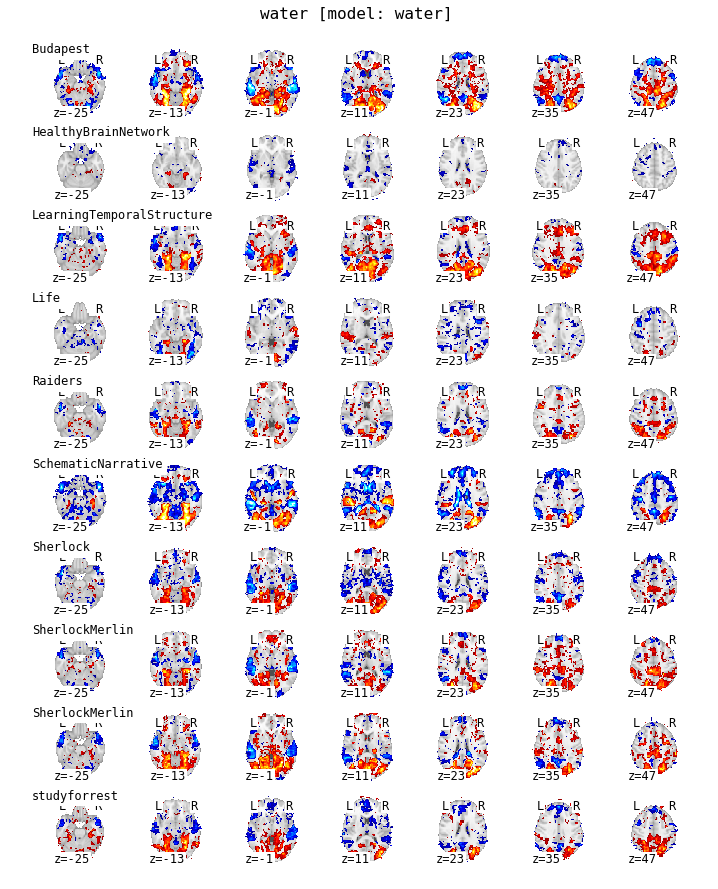

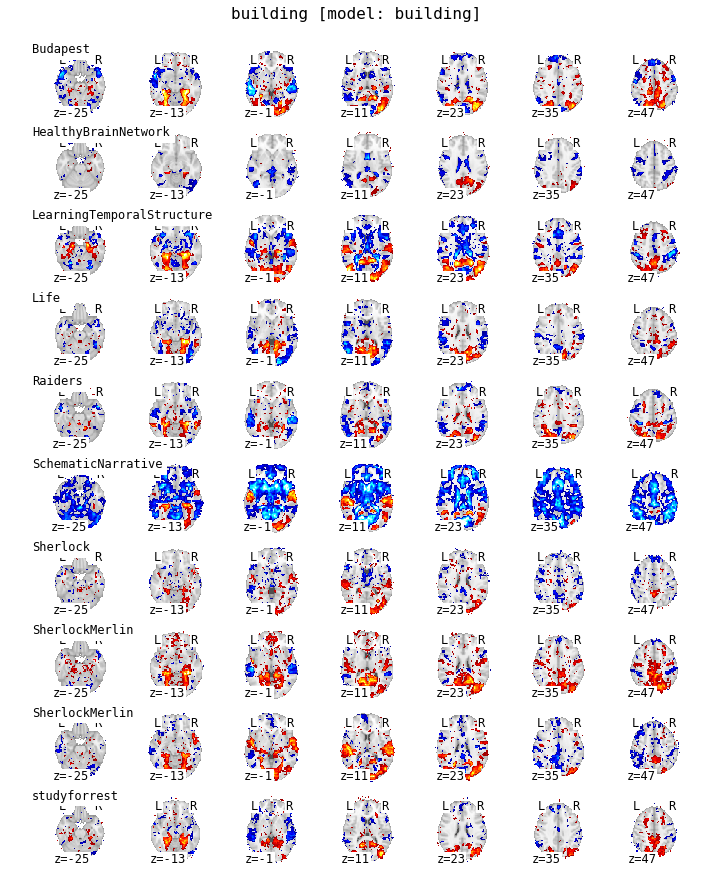

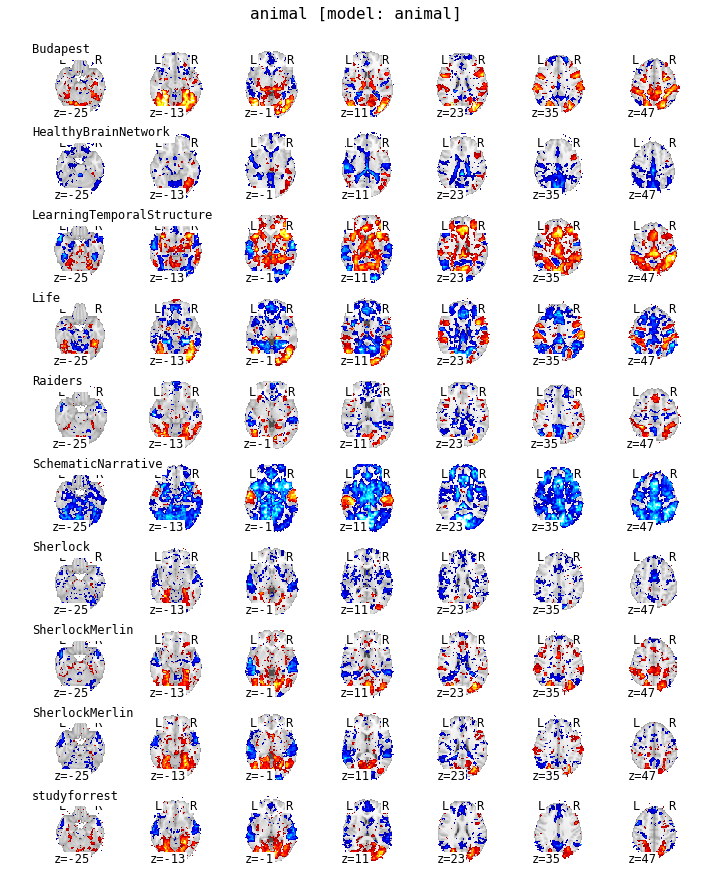

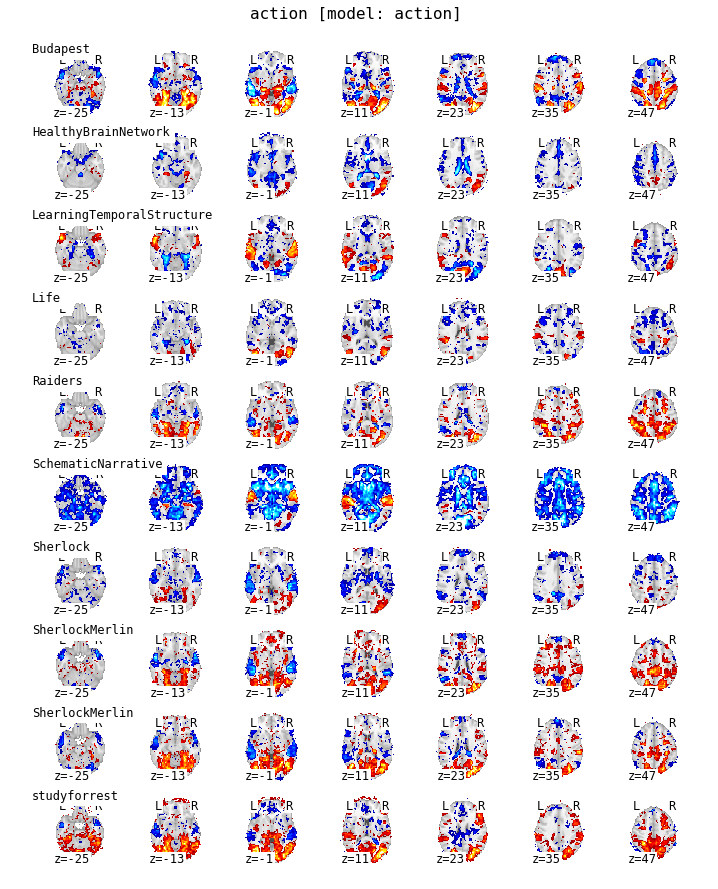

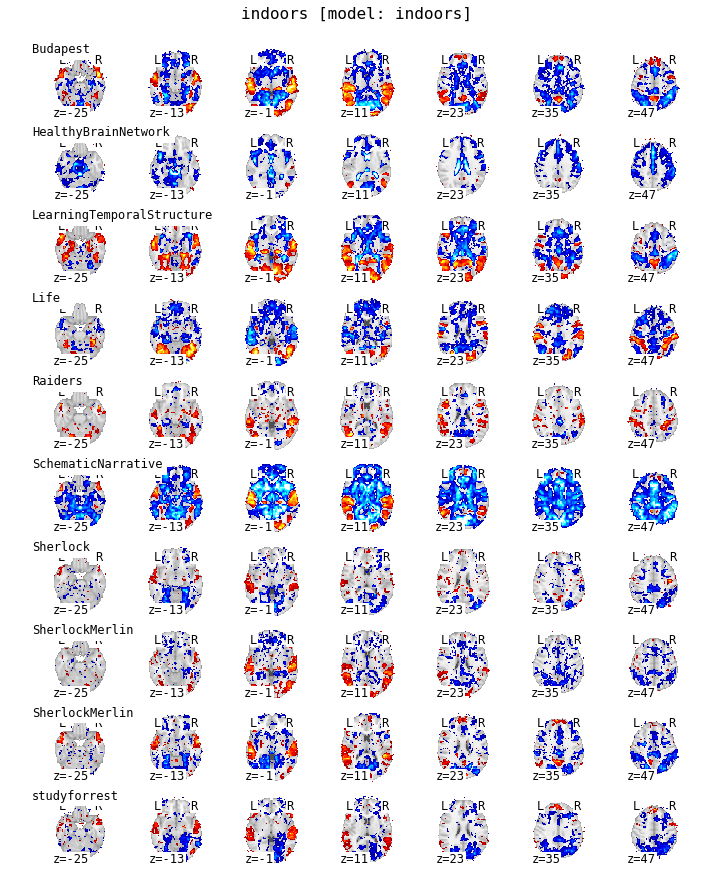

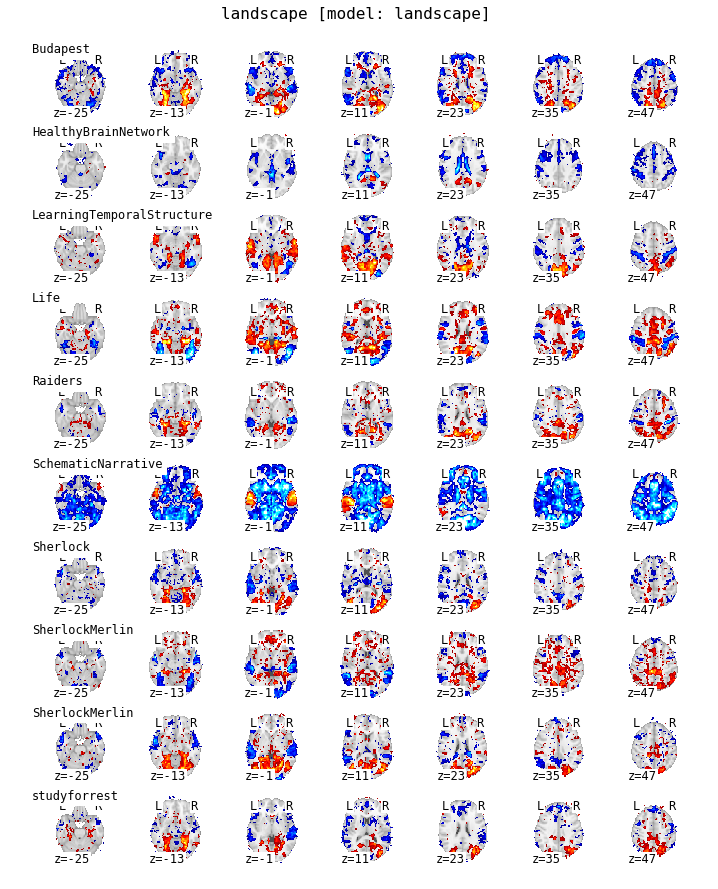

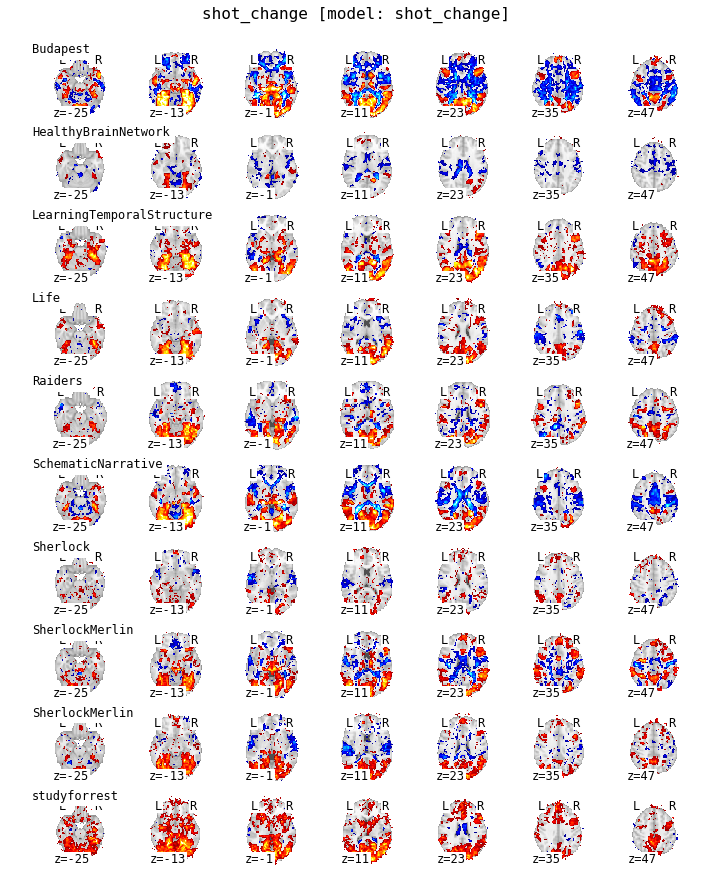

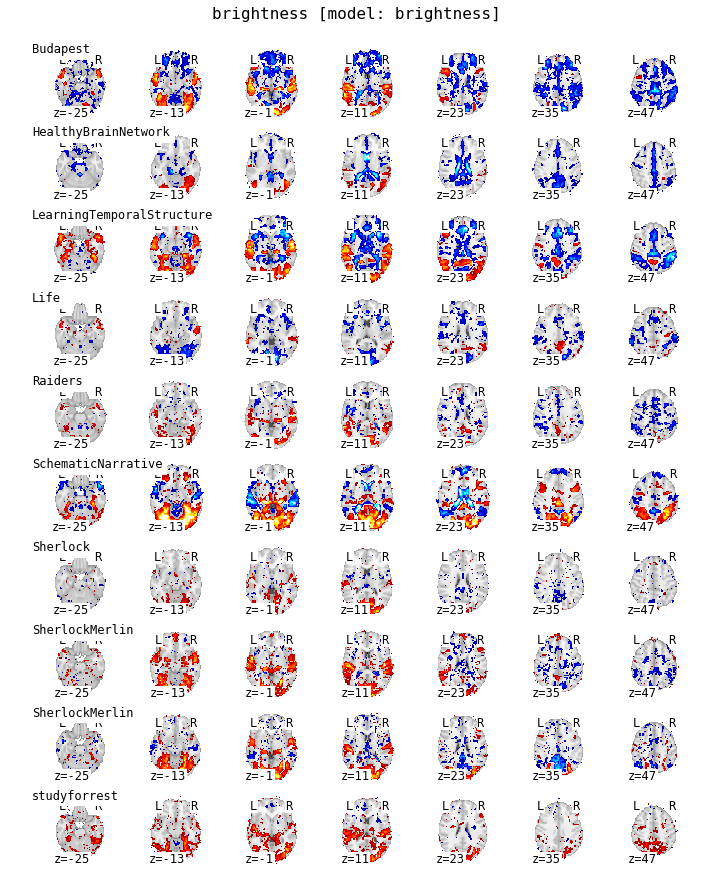

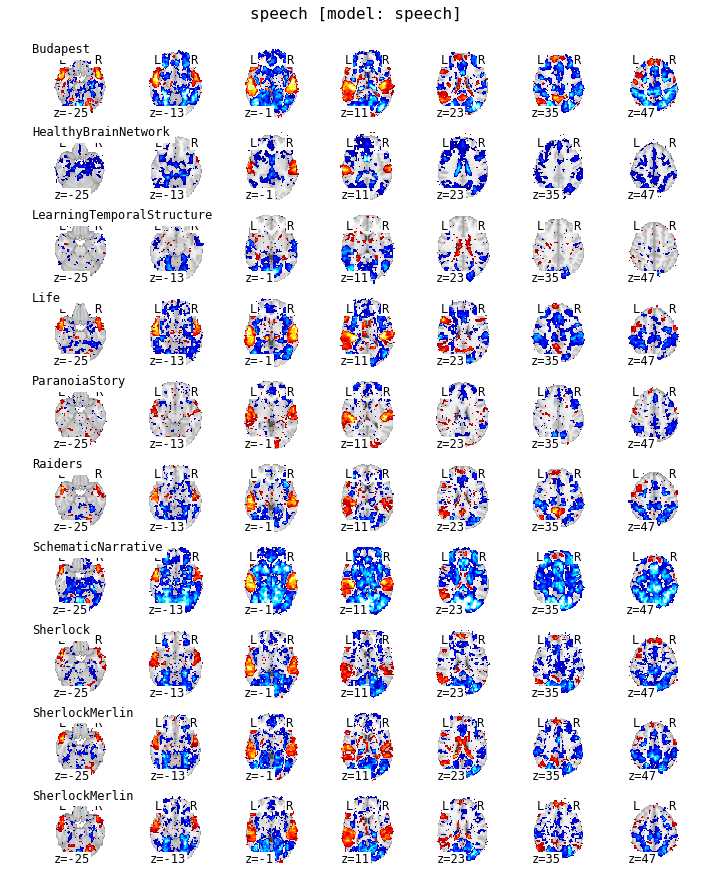

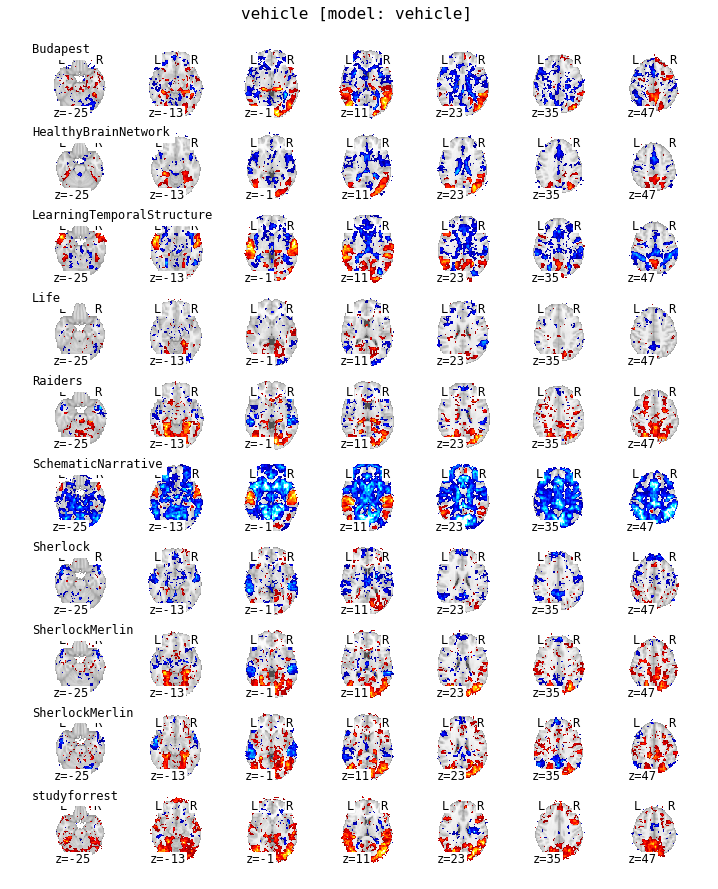

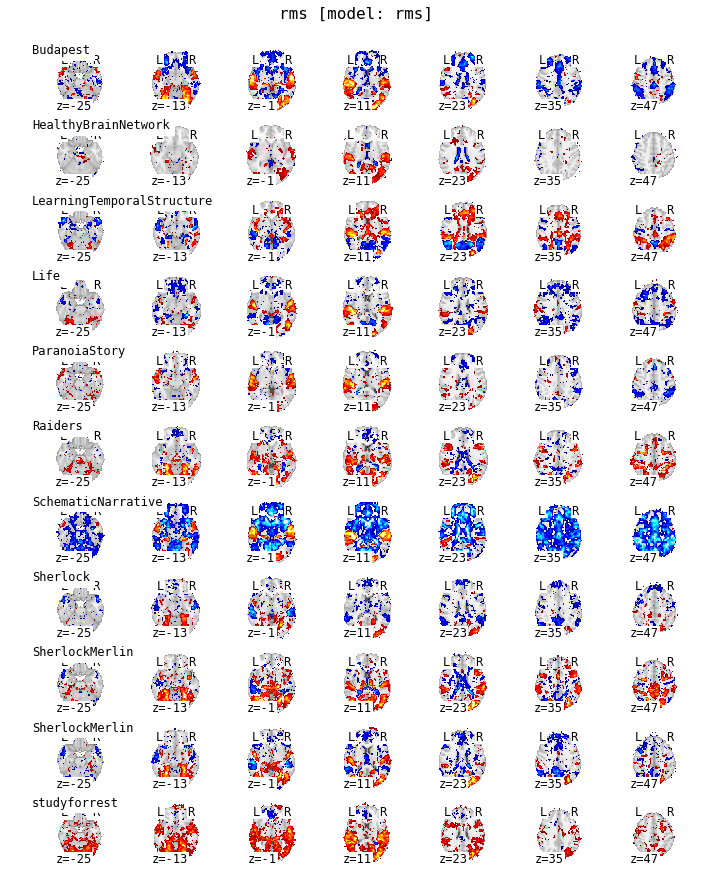

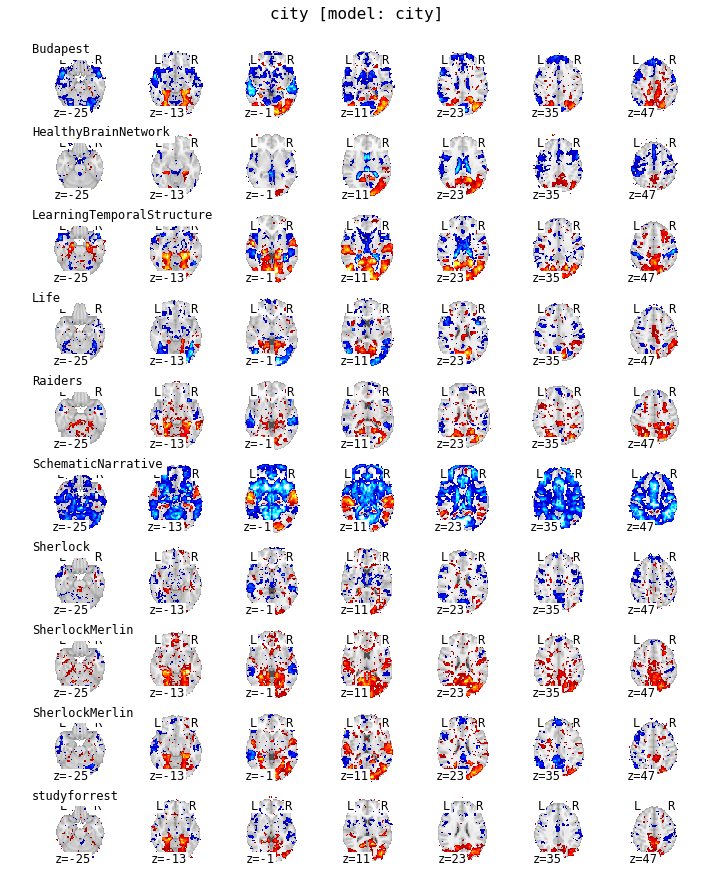

In [64]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(flat_models,
                          vmax=10, display_mode='z', figsize=(12,15),
                          threshold=1.96, colorbar=False)